In [2]:
import numpy as np
from scipy import stats
from scipy import linalg
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_state_city

## Pure State Samplers

In [ ]:
## ???

## Samplers of the Density Matrix

In [3]:
def GinibreRandomMatrix(N):
    return np.random.normal( size = ( N, N ) ) + 1j * np.random.normal( size = ( N, N ) )

In [4]:
def depurate(mat):
    return np.array([[mat[0,0].real, mat[0, 1]], [mat[1,0], mat[1,1].real]])

In [5]:
def purity(ρ):
    return ρ.dot(ρ.conj().T).trace().real

In [6]:
def HaarRandomMatrix(N):
    GinibreMatrix = GinibreRandomMatrix(N)
    X = GinibreMatrix.dot(GinibreMatrix.conj().T)
    return X / np.trace(X)

In [7]:
def _HaarRandomMatrix(N):
    GinibreMatrix = GinibreRandomMatrix(N)
    Q, R = linalg.qr(GinibreMatrix)
    Lambda = np.diag([R[i, i] / np.abs(R[i, i]) for i in range(N)])
    X = Q.dot(Lambda)
    print(X)
    return X

In [8]:
def BuresRandomMatrix(N):
    UnitaryMatrix = stats.unitary_group.rvs(N)
    GinibreMatrix = GinibreRandomMatrix(N)
    U = (1 + UnitaryMatrix)
    X = U.dot(GinibreMatrix)
    X = X.dot(X.conj().T)
    return X / np.trace(X)

In [9]:
G1 = GinibreRandomMatrix(2)
G1

array([[3.7476415 +0.90123141j, 0.27223362+1.84754805j],
       [0.26914746-1.09618891j, 1.15086785+1.09475542j]])

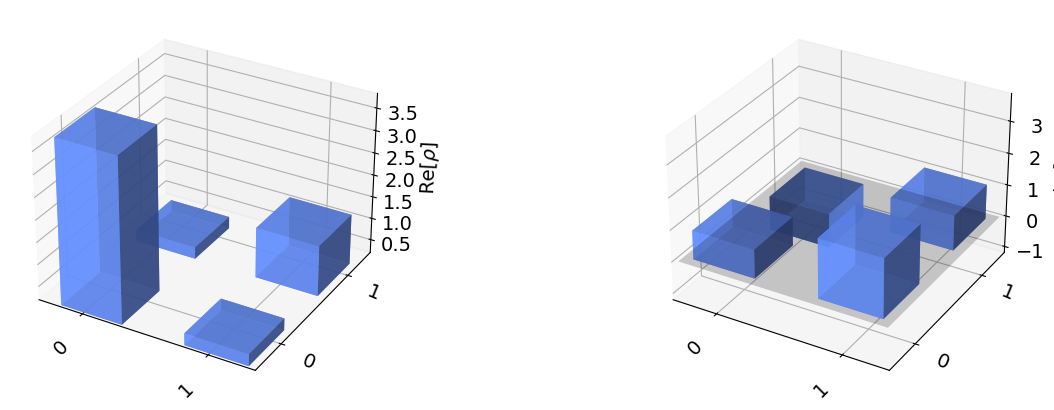

In [15]:
plot_state_city(G1, alpha=0.75)

In [29]:
H1 = HaarRandomMatrix(2)
H1

array([[0.55578104+5.07455609e-18j, 0.12921898+2.72285097e-01j],
       [0.12921898-2.72285097e-01j, 0.44421896-5.07455609e-18j]])

In [32]:
plot_state_city(H1, alpha=0.75, filename = "HaarSample2.png")

In [33]:
B1 = BuresRandomMatrix(2)
B1

array([[0.31706961+2.95368025e-18j, 0.1970344 -3.43308096e-01j],
       [0.1970344 +3.43308096e-01j, 0.68293039-2.95368025e-18j]])

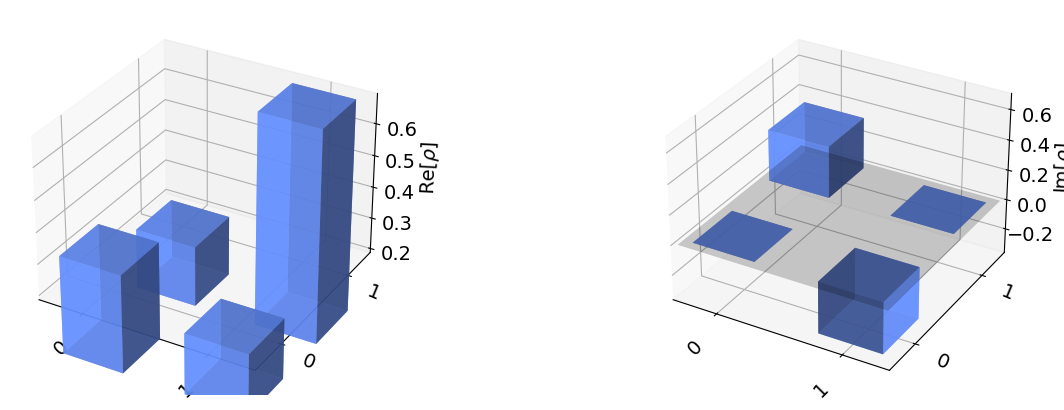

In [34]:
plot_state_city(B1, alpha=0.75)

## Measurement of the Density Matrix

In [35]:
def measure(ρ):
    x = np.trace(np.dot(ρ, σx)).real
    y = np.trace(np.dot(ρ, σy)).real
    z = np.trace(np.dot(ρ, σz)).real
    return [x, y, z]

In [36]:
def plot_bloch_sphere(bloch_vectors):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    ax.grid(False)
    ax.set_axis_off()
    ax.view_init(30, 45)
    # ax.dist = 7

    # Draw the axes (source: https://github.com/matplotlib/matplotlib/issues/13575)
    x, y, z = np.array([[-1.5,0,0], [0,-1.5,0], [0,0,-1.5]])
    u, v, w = np.array([[3,0,0], [0,3,0], [0,0,3]])
    ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.05, color="black", linewidth=0.5)

    ax.text(0, 0, 1.7, r"|0⟩", color="black", fontsize=16)
    ax.text(0, 0, -1.9, r"|1⟩", color="black", fontsize=16)
    ax.text(1.9, 0, 0, r"|+⟩", color="black", fontsize=16)
    ax.text(-1.7, 0, 0, r"|–⟩", color="black", fontsize=16)
    ax.text(0, 1.7, 0, r"|i+⟩", color="black", fontsize=16)
    ax.text(0,-1.9, 0, r"|i–⟩", color="black", fontsize=16)

    ax.scatter(
        bloch_vectors[:,0], bloch_vectors[:,1], bloch_vectors[:, 2], c='#e29d9e', alpha=0.3
    )

In [37]:
I = np.eye(2)
σx = np.array([[0, 1], [1, 0]])
σy = np.array([[0, -1j], [1j, 0]])
σz = np.array([[1, 0], [0, -1]])

In [38]:
ρ = HaarRandomMatrix(2)
ρ

array([[ 0.19484538-4.32997756e-18j, -0.22502499+2.05826015e-01j],
       [-0.22502499-2.05826015e-01j,  0.80515462+4.32997756e-18j]])

In [39]:
purity(ρ)

0.8722398675693882

In [84]:
ρ

array([[ 0.19484538-4.32997756e-18j, -0.22502499+2.05826015e-01j],
       [-0.22502499-2.05826015e-01j,  0.80515462+4.32997756e-18j]])

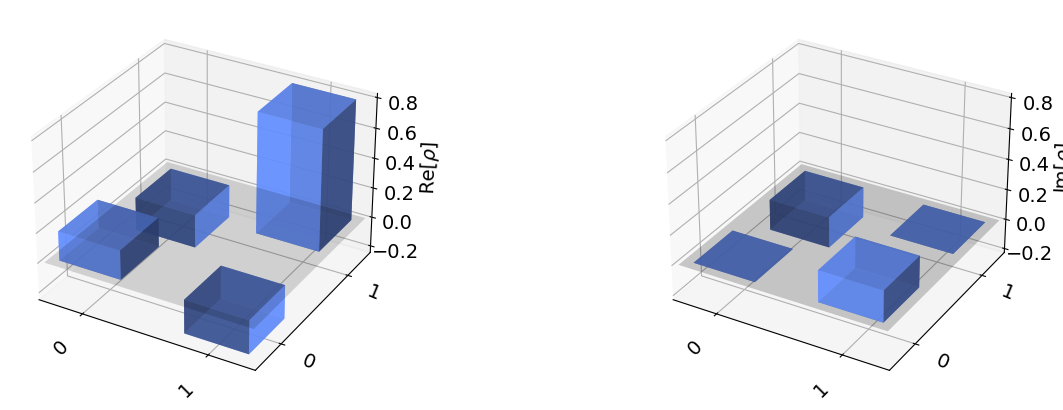

In [83]:
plot_state_city(ρ, alpha=0.75)

In [40]:
R = measure(ρ)
R

[-0.4500499799186925, -0.4116520295772157, -0.6103092308485265]

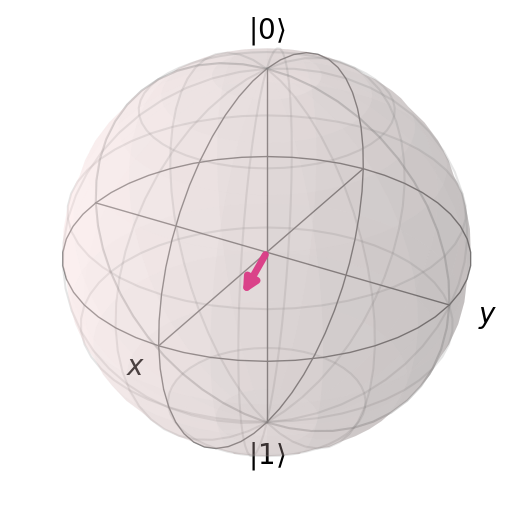

In [64]:
plot_bloch_vector(R)

## Sampling

In [65]:
nSamples = 2000

### Haar Measure

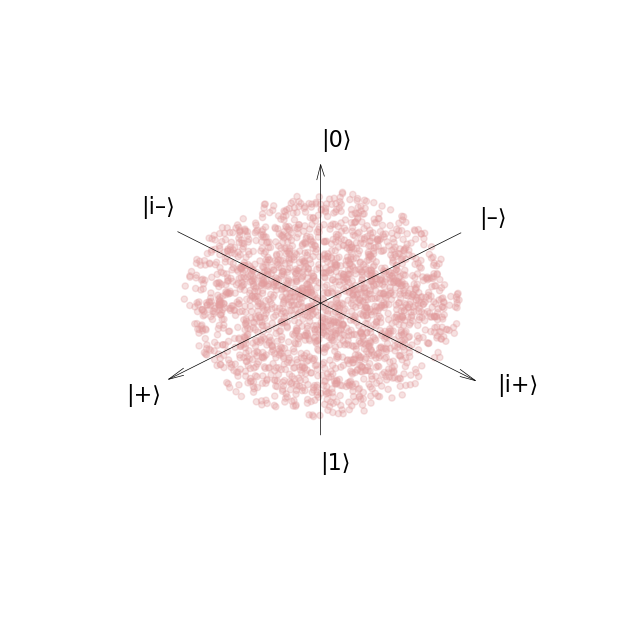

In [66]:
ρSamples = [HaarRandomMatrix(2) for _ in range(nSamples)]
measuredStates = np.array([measure(ρ) for ρ in ρSamples])
plot_bloch_sphere(measuredStates)

In [67]:
[np.linalg.norm(elm) for elm in measuredStates][:5]

[0.8488048806755791,
 0.9909445655797241,
 0.21700069119085974,
 0.6778210246347441,
 0.9908151895309801]

### Bures Measure

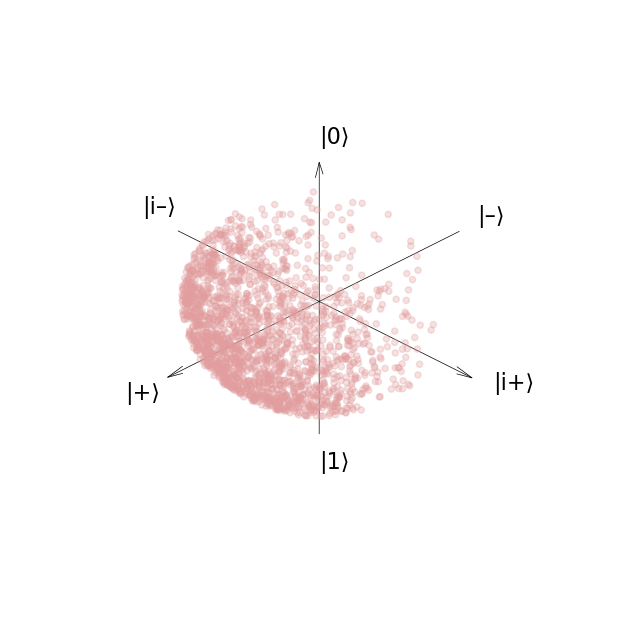

In [72]:
ρSamples = [BuresRandomMatrix(2) for _ in range(nSamples)]
measuredStates = np.array([measure(ρ) for ρ in ρSamples])
plot_bloch_sphere(measuredStates)

In [309]:
measuredStates[:5]

array([[ 0.48898908,  0.05821002, -0.81335565],
       [ 0.56714167,  0.58666559, -0.17573776],
       [-0.37432642,  0.50272252,  0.2932213 ],
       [ 0.55802462, -0.07168691, -0.54882074],
       [ 0.57990212,  0.53676632, -0.40408918]])

In [71]:
import qiskit
qiskit.__version__

'0.22.0'